### Connectivity co-clustering example

In this example we will co-cluster neurons from three hemispheres:
1. FlyWire left
2. FlyWire right 
3. hemibrain right

Some notes:
- we're using a local copy of the edge list for FlyWire; this speeds things up 
  considerably but is not strictly necessary - if you remove the `file` argument 
  `cocoa` will instead fetch connectivity via the CAVE client 
  

In [1]:
import cocoa as cc

In [2]:
# Here we define our three datasets
ds1 = cc.FlyWire(
    label="FlyWire_RHS",
    cn_file="~/Downloads/syn_proof_analysis_filtered_767.feather",
    materialization=767,
)
ds2 = cc.FlyWire(
    label="FlyWire_LHS",
    cn_file="~/Downloads/syn_proof_analysis_filtered_767.feather",
    materialization=767,
)
ds3 = cc.Hemibrain(
    label="hemibrain",
)

# Inspect what we generated
ds1, ds2, ds3

(class FlyWire <label=FlyWire_RHS;neurons=0>,
 class FlyWire <label=FlyWire_LHS;neurons=0>,
 class Hemibrain <label=hemibrain;neurons=0>)

In [3]:
# Next we need to add neurons to each dataset
# You can add them using fields (depending on the dataset this could be e.g.
# type, super class or lineage) or using IDs
ds1.add_neurons("hemibrain_type:IB022", sides="right")
ds2.add_neurons("hemibrain_type:IB022", sides="left")
ds3.add_neurons("type:IB022", sides="right")

Caching FlyWire annotations for materialization '767'... Done.
Caching hemibrain annotations... Done.


class Hemibrain <label=hemibrain;neurons=2>

In [4]:
# Now combine these three datasets and cluster them
cl = cc.Clustering([ds1, ds2, ds3]).compile()

Compiling connectivity vector for "FlyWire_RHS" (FlyWire) [1/3]
Compiling connectivity vector for "FlyWire_LHS" (FlyWire) [2/3]
Compiling connectivity vector for "hemibrain" (Hemibrain) [3/3]
Using on average 59.6% of neurons' synapses.
Worst case is keeping 49.7% of its synapses.
Calulating cosine distances... Done.
All done.


In [5]:
# To get the raw distances
cl.dists_

,IBO22b_FlyWire_RHS,IBO22a_FlyWire_RHS,IBO22a_FlyWire_LHS,IBO22b_FlyWire_LHS,IB022_hemibrain,IB022_hemibrain
720575940625205392,0.000000,0.113535,0.079884,0.091356,0.344597,0.381602
720575940625897572,0.113535,0.000000,0.044914,0.061322,0.281769,0.417775
720575940630344466,0.079884,0.044914,0.000000,0.063572,0.290912,0.397021
720575940655571617,0.091356,0.061322,0.063572,0.000000,0.322563,0.414131
976964834,0.344597,0.281769,0.290912,0.322563,0.000000,0.122988
1161459105,0.381602,0.417775,0.397021,0.414131,0.122988,0.000000


/Users/philipps/Google Drive/Cloudbox/Github/cocoa/cocoa/cluster.py:612: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


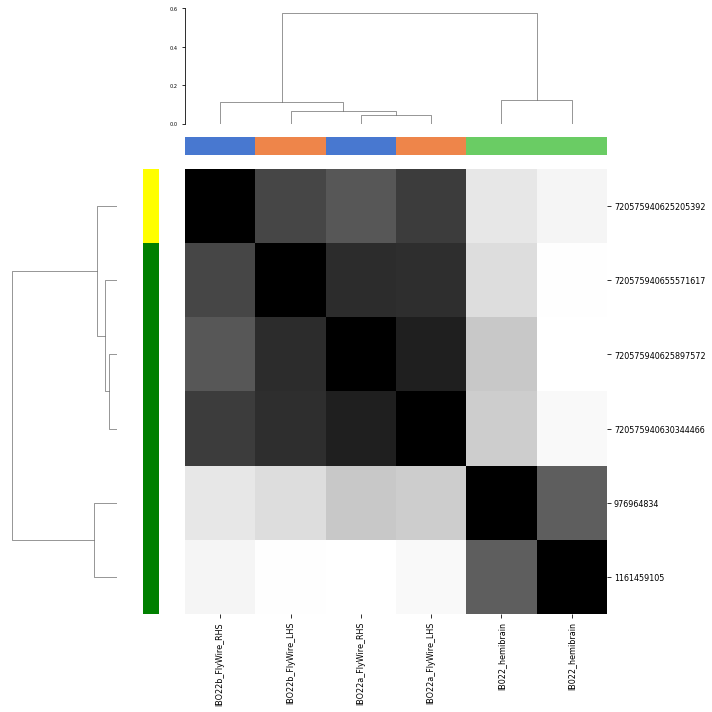

In [6]:
# The `Clustering` has a bunch of useful methods for further analysis
# The colors in the horizontal bar on top represent the individual datasets
# The colors in the vertical bar on the left represent the fraction of connectivity
# used
cl.plot_clustermap(fontsize=8)

In [7]:
# Turn into table
# Note that we're adding a column with a clustering where clusters are defined
# by having to contain specimen from all datasets
cl.to_table(clusters=cl.extract_homogeneous_clusters())

,id,label,dataset,cn_frac_used,dend_ix,cluster
0,720575940625205392,IBO22b,FlyWire_RHS,0.497288,0,0
1,720575940655571617,IBO22b,FlyWire_LHS,0.595825,1,0
2,720575940625897572,IBO22a,FlyWire_RHS,0.669554,2,0
3,720575940630344466,IBO22a,FlyWire_LHS,0.670947,3,0
4,976964834,IB022,hemibrain,0.591274,4,0
5,1161459105,IB022,hemibrain,0.549240,5,0
